In [25]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from sympy.plotting import plot

In [225]:
alpha=10

def sigmoidFunction(x):
    return 1/(1+np.exp(-alpha*x))

def derivationSigmoidFunction(x):
    return alpha*sp.exp(-alpha*x)/(1 + sp.exp(-alpha*x))**2


def setWeightMatrix(MLVector):
    weightMatrix=np.zeros((np.max(MLVector)**2, np.shape(MLVector)[0]-1))
    for i in range(np.shape(MLVector)[0]):
        if(i+1<np.shape(MLVector)[0]):
            b=0;
            for j in range(MLVector.item(i)):
                for z in range(MLVector.item(i+1)):
                    a=initialWeight(1)
                    weightMatrix[b,i]= a
                    b=b+1
    return weightMatrix


def initialWeight(setting):
    if(setting==1):
        return np.random.randint(1,10)
    return 0

def getLocalField(MLVector, weightMatrix, inputX, outputY):
    
    if(MLVector.item(0)<np.shape(inputX)[0]):
        print(" input vector x to big vor NN")
        print(inputX)
        return 0
    if(MLVector.item(0)>np.shape(inputX)[0]):
        print(" input vector x to small vor NN")
        return 0
    else:
        
        localField=np.zeros((np.max(MLVector), np.shape(MLVector)[0]-1))
        
        for i in range(MLVector.item(0)):
            outputY[i,0]=inputX.item(i)
       
        
        for i in range(1, np.shape(MLVector)[0]):
            a=0;
            for j in range(MLVector.item(i)):
                for z in range(MLVector.item(i-1)):
                    localField[z,i-1]= localField[z,i-1] + (outputY[j,i-1])* weightMatrix[a,i-1]
                    a=a+1
            for j in range(MLVector.item(i)):
                outputY[j,i]=sigmoidFunction(localField[j,i-1]);
        return localField
    
    
def backProp( MLVector, localField, weightMatrix, outputY, desiredOutput, learningRate):
    
    delta=np.zeros((np.max(MLVector), np.shape(MLVector)[0]-1))
    a=0;
    for i in range(MLVector.item(np.shape(MLVector)[0]-1)):
        for j in range(MLVector.item(np.shape(MLVector)[0]-2)):
            y=outputY[i,np.shape(MLVector)[0]-2]
            delta[i,np.shape(MLVector)[0]-2]=(alpha*y*(1-y))*(desiredOutput[i]-y)
            weightMatrix[a,np.shape(MLVector)[0]-2]=weightMatrix[a,np.shape(MLVector)[0]-2]+ (learningRate*delta[i,np.shape(MLVector)[0]-2]*y)
            a=a+1
            #print( (learningRate*delta[i,np.shape(MLVector)[0]-2]*y))
            
    for i in reversed(range(np.shape(MLVector)[0]-2)):
        
        for j in range(MLVector.item(i)):
            sumDelta=0
            mulDeltaWeights=0;
            a=j;
            pos=j;
            for y in range(MLVector.item(i+1)):
                sumDelta=sumDelta+delta[y,i+1]
                
            for y in range(MLVector.item(i+1)):
                mulDeltaWeights=mulDeltaWeights+ (sumDelta* weightMatrix[a,i])
                a=a+MLVector.item(i)
            delta[j,i]=(alpha*outputY[j,i+1]*(1-outputY[j,i+1]))*mulDeltaWeights
              
                  
            for y in range(MLVector.item(i+1)):
                weightMatrix[pos,i]=weightMatrix[pos,i]+ (learningRate*delta[j,i]*outputY[j,i])
               # print( (learningRate*delta[j,i]*outputY[j,i+1]))
                pos=pos+MLVector.item(i)
               

In [234]:
MLVector=np.array([[2],[2],[1]])
learningRate=0.9
weightMatrix=setWeightMatrix(MLVector)


print(weightMatrix)
inputX= np.array([[1,1],[0,1],[1,0],[0,0]])
desiredOutput= np.array([[0],[1],[1],[0]])

error=np.zeros(( 10))

for i in range(0,10):

    y=np.random.randint(0,3)
    outputY=np.zeros((np.max(MLVector), np.shape(MLVector)[0]))
    localField = getLocalField(MLVector, weightMatrix, inputX[y], outputY)
    backProp(MLVector, localField, weightMatrix,  outputY, desiredOutput[y], learningRate)
    error[i]=(1/2) *(desiredOutput[y]-outputY[0,2])**2

print(weightMatrix)    

print(outputY)

[[ 2.  4.]
 [ 7.  5.]
 [ 4.  0.]
 [ 7.  0.]]
[[ 2.  4.]
 [ 7.  5.]
 [ 4.  0.]
 [ 7.  0.]]
[[ 1.  1.  1.]
 [ 0.  1.  0.]]


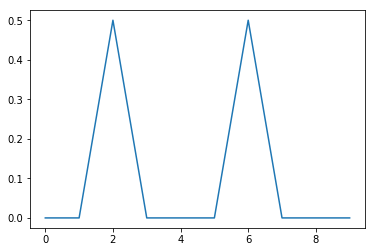

In [235]:
plt.plot(error)
plt.show()
